# Data Understanding
Berdasarkan isi dari dataset zara.csv, berikut penjelasan dari masing-masing kolom:

| Kolom              | Deskripsi                                                      |
| ------------------ | -------------------------------------------------------------- |
| `Product ID`       | ID unik produk.                                                |
| `Product Position` | Lokasi peletakan produk di toko (misalnya Aisle atau End-cap). |
| `Promotion`        | Apakah produk sedang dalam promosi (`Yes`/`No`).               |
| `Product Category` | Kategori utama produk (semua Clothing dalam sampel).           |
| `Seasonal`         | Apakah produk bersifat musiman (`Yes`/`No`).                   |
| `Sales Volume`     | Jumlah penjualan produk. **(Target untuk prediksi)**           |
| `brand`            | Nama merek (semua Zara).                                       |
| `url`              | Link produk di situs web.                                      |
| `sku`              | Kode SKU produk.                                               |
| `name`             | Nama produk.                                                   |
| `description`      | Deskripsi produk.                                              |
| `price`            | Harga produk.                                                  |
| `currency`         | Mata uang.                                                     |
| `scraped_at`       | Tanggal dan waktu scraping data.                               |
| `terms`            | Kategori produk lebih spesifik (misalnya jackets).             |
| `section`          | Bagian toko (misalnya MAN, WOMAN).                             |


# Goals
Tujuan Analisis Data Zara Sales

1. Memahami Performa Penjualan Produk
*   Mengidentifikasi produk dengan penjualan tertinggi dan terendah.
*   Mengetahui kategori (`term`) dan bagian toko (`section`) yang menghasilkan penjualan terbanyak.

2. Menganalisis Pengaruh Harga terhadap Penjualan
*   Mengetahui hubungan antara harga produk (`price`) dan volume penjualan (`Sales Volume`).
*   Menentukan apakah produk dengan harga lebih murah cenderung lebih laku.

3. Mengevaluasi Efektivitas Promosi dan Penempatan Produk
*   Menganalisis apakah produk yang diberi promosi (`Promotion = Yes`) memiliki volume penjualan lebih tinggi.
*   Menilai perbedaan penjualan antara produk yang ditempatkan di Aisle vs End-cap.

4. Menilai Pengaruh Faktor Musiman terhadap Penjualan
*   Menganalisis apakah produk musiman (`Seasonal = Yes`) memiliki tren penjualan yang berbeda dibanding produk reguler.




In [ ]:
# Import Library
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Data Cleaning

In [ ]:
df = pd.read_csv('/content/zara.csv', sep=';')  # Ganti path sesuai dengan lokasi file di Colab

df.head()

,Product ID,Product Position,Promotion,Product Category,Seasonal,Sales Volume,brand,url,sku,name,description,price,currency,scraped_at,terms,section
0,185102,Aisle,No,Clothing,No,2823,Zara,https://www.zara.com/us/en/basic-puffer-jacket...,272145190-250-2,BASIC PUFFER JACKET,Puffer jacket made of tear-resistant ripstop f...,19.99,USD,2024-02-19T08:50:05.654618,jackets,MAN
1,188771,Aisle,No,Clothing,No,654,Zara,https://www.zara.com/us/en/tuxedo-jacket-p0889...,324052738-800-46,TUXEDO JACKET,Straight fit blazer. Pointed lapel collar and ...,169.00,USD,2024-02-19T08:50:06.590930,jackets,MAN
2,180176,End-cap,Yes,Clothing,Yes,2220,Zara,https://www.zara.com/us/en/slim-fit-suit-jacke...,335342680-800-44,SLIM FIT SUIT JACKET,Slim fit jacket. Notched lapel collar. Long sl...,129.00,USD,2024-02-19T08:50:07.301419,jackets,MAN
3,112917,Aisle,Yes,Clothing,Yes,1568,Zara,https://www.zara.com/us/en/stretch-suit-jacket...,328303236-420-44,STRETCH SUIT JACKET,Slim fit jacket made of viscose blend fabric. ...,129.00,USD,2024-02-19T08:50:07.882922,jackets,MAN
4,192936,End-cap,No,Clothing,Yes,2942,Zara,https://www.zara.com/us/en/double-faced-jacket...,312368260-800-2,DOUBLE FACED JACKET,Jacket made of faux leather faux shearling wit...,139.00,USD,2024-02-19T08:50:08.453847,jackets,MAN


In [ ]:
print(df.shape)

(252, 16)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product ID        252 non-null    int64  
 1   Product Position  252 non-null    object 
 2   Promotion         252 non-null    object 
 3   Product Category  252 non-null    object 
 4   Seasonal          252 non-null    object 
 5   Sales Volume      252 non-null    int64  
 6   brand             252 non-null    object 
 7   url               252 non-null    object 
 8   sku               252 non-null    object 
 9   name              251 non-null    object 
 10  description       250 non-null    object 
 11  price             252 non-null    float64
 12  currency          252 non-null    object 
 13  scraped_at        252 non-null    object 
 14  terms             252 non-null    object 
 15  section           252 non-null    object 
dtypes: float64(1), int64(2), object(13)
memory u

In [ ]:
# cek missing value
df.isnull().sum()

,0
Product ID,0
Product Position,0
Promotion,0
Product Category,0
Seasonal,0
Sales Volume,0
brand,0
url,0
sku,0
name,1


In [ ]:
df[df.isnull().any(axis=1)]


,Product ID,Product Position,Promotion,Product Category,Seasonal,Sales Volume,brand,url,sku,name,description,price,currency,scraped_at,terms,section
60,151925,End-cap,Yes,Clothing,Yes,2179,Zara,https://www.zara.com/us/en/vintage-effect-leat...,320774184-800-97,VINTAGE EFFECT LEATHER BOMBER JACKET,NaN,299.0,USD,2024-02-19T08:50:43.543555,jackets,MAN
72,173576,End-cap,Yes,Clothing,No,1838,Zara,https://www.zara.com/us/en/-p04310461.html,336378923-700-2,NaN,NaN,129.0,USD,2024-02-19T08:50:54.476057,jackets,MAN


In [ ]:
# Tangani missing values
df['name'] = df['name'].fillna(df['name'].mode()[0])
df['description'] = df['description'].fillna(df['description'].mode()[0])

df.isnull().sum()


,0
Product ID,0
Product Position,0
Promotion,0
Product Category,0
Seasonal,0
Sales Volume,0
brand,0
url,0
sku,0
name,0


In [ ]:
# cek data duplikat
df.duplicated().sum()

np.int64(0)

In [ ]:
# Ubah kolom tanggal ke datetime
df['scraped_at'] = pd.to_datetime(df['scraped_at'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Product ID        252 non-null    int64         
 1   Product Position  252 non-null    object        
 2   Promotion         252 non-null    object        
 3   Product Category  252 non-null    object        
 4   Seasonal          252 non-null    object        
 5   Sales Volume      252 non-null    int64         
 6   brand             252 non-null    object        
 7   url               252 non-null    object        
 8   sku               252 non-null    object        
 9   name              252 non-null    object        
 10  description       252 non-null    object        
 11  price             252 non-null    float64       
 12  currency          252 non-null    object        
 13  scraped_at        252 non-null    datetime64[ns]
 14  terms             252 non-

In [ ]:
print(df.shape)

(252, 16)


# Data Manipulation

## 1. Memahami Performa Penjualan Produk

In [ ]:
df_grouped = df.groupby('name', as_index=False)['Sales Volume'].sum()

# Produk dengan penjualan tertinggi dan terendah
top_selling = df.sort_values('Sales Volume', ascending=False).head(10)
least_selling = df.sort_values('Sales Volume').head(10)

In [ ]:
# Total penjualan berdasarkan 'term' dan 'section'
sales_by_term = df.groupby('terms')['Sales Volume'].sum().sort_values(ascending=False)
sales_by_section = df.groupby('section')['Sales Volume'].sum().sort_values(ascending=False)

## 2. Menganalisis Pengaruh Harga terhadap Penjualan

In [ ]:
# Mengonversi harga dari USD ke Rupiah
df['Price Rupiah'] = df['price'] * 16000

# Buat kolom format string untuk tampilan
df['Price Rupiah format'] = df['Price Rupiah'].apply(lambda x: f"Rp{x:,.0f}")

# Cek hasil
df[['price', 'Price Rupiah','Price Rupiah format']].head()

,price,Price Rupiah,Price Rupiah format
0,19.99,319840.0,"Rp319,840"
1,169.00,2704000.0,"Rp2,704,000"
2,129.00,2064000.0,"Rp2,064,000"
3,129.00,2064000.0,"Rp2,064,000"
4,139.00,2224000.0,"Rp2,224,000"


In [ ]:
# Korelasi sederhana antara price dan sales volume
correlation = df[['Price Rupiah', 'Sales Volume']].corr()

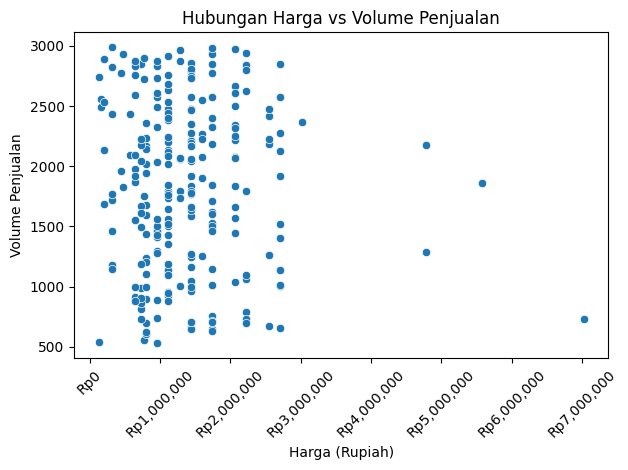

In [ ]:
sns.scatterplot(data=df, x='Price Rupiah', y='Sales Volume')
plt.title("Hubungan Harga vs Volume Penjualan")
plt.xlabel("Harga (Rupiah)")
plt.ylabel("Volume Penjualan")
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'Rp{x:,.0f}'))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 3. Mengevaluasi Efektivitas Promosi dan Penempatan Produk

In [ ]:
# Rata-rata volume penjualan dengan dan tanpa promosi
promo_effect = df.groupby('Promotion')['Sales Volume'].mean()

In [ ]:
# Rata-rata penjualan berdasarkan posisi produk
placement_effect = df.groupby('Product Position')['Sales Volume'].mean()

##  4. Menilai Pengaruh Faktor Musiman terhadap Penjualan

In [ ]:
# Rata-rata penjualan musiman vs non-musiman
seasonal_effect = df.groupby('Seasonal')['Sales Volume'].mean()

In [ ]:
df['Revenue'] = df['Sales Volume'] * df['Price Rupiah']

# EDA

## Memahami Performa Penjualan Produk

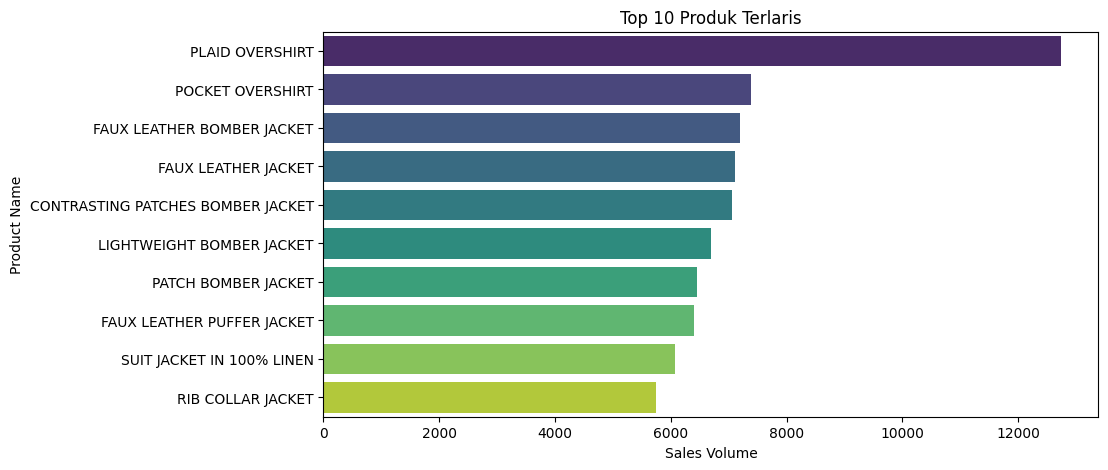

In [ ]:
# Produk dengan Penjualan Tertinggi
top_selling = df_grouped.sort_values('Sales Volume', ascending=False).head(10)
low_selling = df_grouped.sort_values('Sales Volume', ascending=True).head(10)

# Visualisasi
plt.figure(figsize=(10, 5))
sns.barplot(data=top_selling, x='Sales Volume', y='name', hue='name', palette='viridis', dodge=False, legend=False)
plt.title('Top 10 Produk Terlaris')
plt.xlabel('Sales Volume')
plt.ylabel('Product Name')
plt.show()

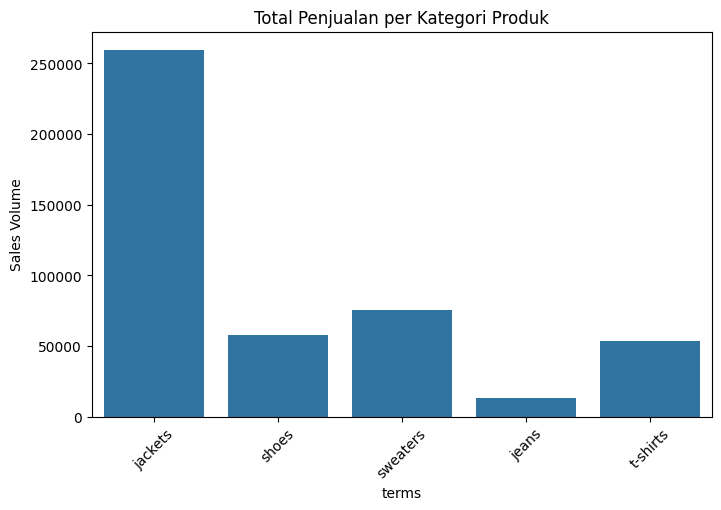

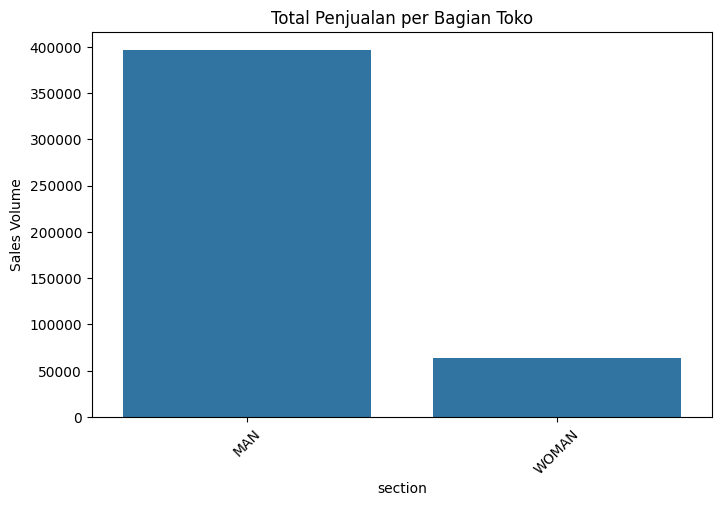

In [ ]:
# Penjualan berdasarkan Kategori (terms) dan Bagian Toko (section)
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x='terms', y='Sales Volume', estimator=sum, errorbar=None)
plt.title('Total Penjualan per Kategori Produk')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(8, 5))
sns.barplot(data=df, x='section', y='Sales Volume', estimator=sum, errorbar=None)
plt.title('Total Penjualan per Bagian Toko')
plt.xticks(rotation=45)
plt.show()


## Pengaruh Harga terhadap Penjualan

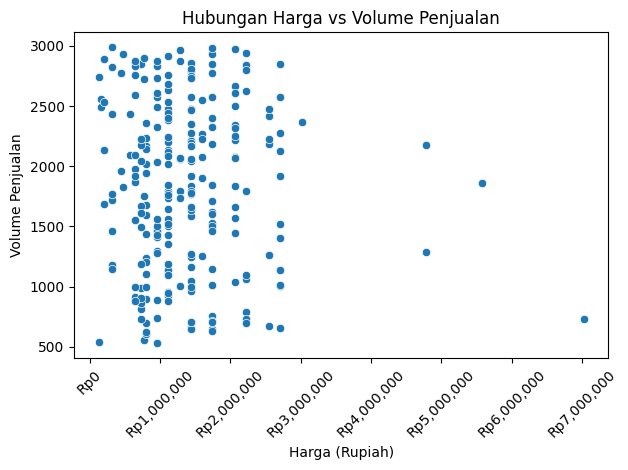

In [ ]:
# Mengetahui hubungan antara harga produk (price) dan volume penjualan (Sales Volume).
sns.scatterplot(data=df, x='Price Rupiah', y='Sales Volume')
plt.title("Hubungan Harga vs Volume Penjualan")
plt.xlabel("Harga (Rupiah)")
plt.ylabel("Volume Penjualan")
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'Rp{x:,.0f}'))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

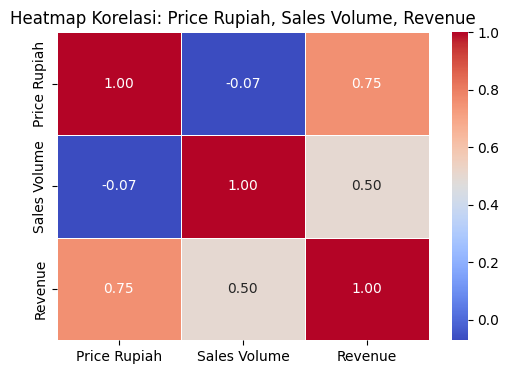

In [ ]:
# Pilih hanya kolom yang diinginkan
selected_cols = ['Price Rupiah', 'Sales Volume', 'Revenue']
num_cols = df[selected_cols].copy()

# Hitung korelasi
corr = num_cols.corr()

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, cbar=True)
plt.title("Heatmap Korelasi: Price Rupiah, Sales Volume, Revenue")
plt.show()


In [ ]:
df[['Price Rupiah', 'Sales Volume']].corr()

,Price Rupiah,Sales Volume
Price Rupiah,1.000000,-0.071359
Sales Volume,-0.071359,1.000000


## Efektivitas Promosi dan Penempatan

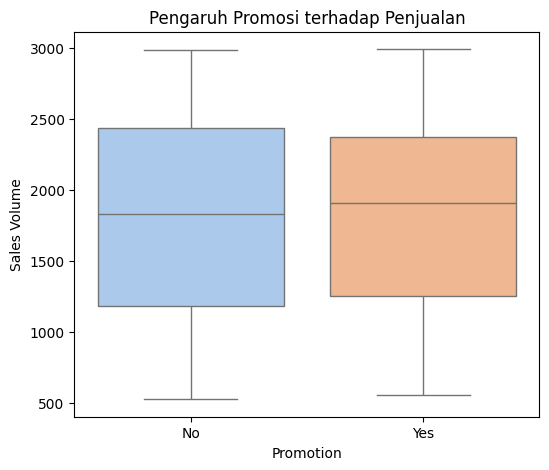

In [ ]:
# Promosi vs Volume Penjualan
plt.figure(figsize=(6, 5))
sns.boxplot(data=df, x='Promotion', y='Sales Volume', hue='Promotion', palette='pastel', legend=False)
plt.title('Pengaruh Promosi terhadap Penjualan')
plt.show()

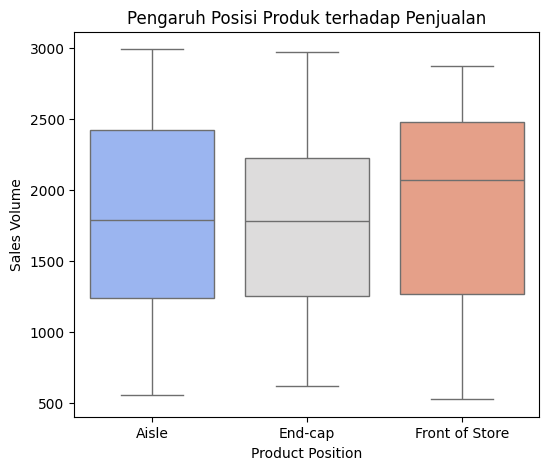

In [ ]:
# Penempatan Produk (Aisle vs End-cap)
plt.figure(figsize=(6, 5))
sns.boxplot(data=df, x='Product Position', y='Sales Volume', hue='Product Position', palette='coolwarm', legend=False)
plt.title('Pengaruh Posisi Produk terhadap Penjualan')
plt.show()

## Pengaruh Faktor Musiman

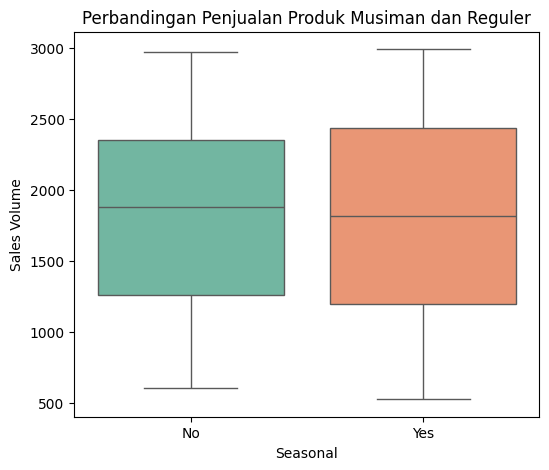

In [ ]:
plt.figure(figsize=(6, 5))
sns.boxplot(data=df, x='Seasonal', y='Sales Volume', hue='Seasonal', palette='Set2', legend=False)
plt.title('Perbandingan Penjualan Produk Musiman dan Reguler')
plt.show()

In [ ]:
# Simpan DataFrame yang sudah dibersihkan
df.to_csv('zara_cleaned.csv', index=False)


In [ ]:
df.head()

,Product ID,Product Position,Promotion,Product Category,Seasonal,Sales Volume,brand,url,sku,name,description,price,currency,scraped_at,terms,section,Price Rupiah,Price Rupiah format,Revenue
0,185102,Aisle,No,Clothing,No,2823,Zara,https://www.zara.com/us/en/basic-puffer-jacket...,272145190-250-2,BASIC PUFFER JACKET,Puffer jacket made of tear-resistant ripstop f...,19.99,USD,2024-02-19 08:50:05.654618,jackets,MAN,319840.0,"Rp319,840",9.029083e+08
1,188771,Aisle,No,Clothing,No,654,Zara,https://www.zara.com/us/en/tuxedo-jacket-p0889...,324052738-800-46,TUXEDO JACKET,Straight fit blazer. Pointed lapel collar and ...,169.00,USD,2024-02-19 08:50:06.590930,jackets,MAN,2704000.0,"Rp2,704,000",1.768416e+09
2,180176,End-cap,Yes,Clothing,Yes,2220,Zara,https://www.zara.com/us/en/slim-fit-suit-jacke...,335342680-800-44,SLIM FIT SUIT JACKET,Slim fit jacket. Notched lapel collar. Long sl...,129.00,USD,2024-02-19 08:50:07.301419,jackets,MAN,2064000.0,"Rp2,064,000",4.582080e+09
3,112917,Aisle,Yes,Clothing,Yes,1568,Zara,https://www.zara.com/us/en/stretch-suit-jacket...,328303236-420-44,STRETCH SUIT JACKET,Slim fit jacket made of viscose blend fabric. ...,129.00,USD,2024-02-19 08:50:07.882922,jackets,MAN,2064000.0,"Rp2,064,000",3.236352e+09
4,192936,End-cap,No,Clothing,Yes,2942,Zara,https://www.zara.com/us/en/double-faced-jacket...,312368260-800-2,DOUBLE FACED JACKET,Jacket made of faux leather faux shearling wit...,139.00,USD,2024-02-19 08:50:08.453847,jackets,MAN,2224000.0,"Rp2,224,000",6.543008e+09
